## Install required libraries

In [ ]:
!pip install matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

## Import required libraries

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import display

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.datasets as datasets

## Change settings

In [7]:
# Warning display off
import warnings
warnings.simplefilter('ignore')

# Change default font size
plt.rcParams['font.size'] = 14

# Change default graph size
plt.rcParams['figure.figsize'] = (6,6)

# Square indicate ON
plt.rcParams['axes.grid'] = True

# Set precision of floating-point numbers in numpy
np.set_printoptions(suppress=True, precision=5)

## GPU utilization

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## Library Implementation of Common Functions

In [ ]:
# Download common functions
!git clone https://github.com/nobu1/PyTorch_Project.git

# Load common functions
from PyTorch_Project.torch_lib1 import *

# Check common function
print(README)

## Prepare for the dataset

In [11]:
transform = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5)
])

In [ ]:
data_root = './data'

# Training dataset
train_set = datasets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = transform)

# Validation dataset
test_set = datasets.CIFAR10(
    root = data_root, train = False,
    download = True, transform = transform)

In [13]:
# Minibatch size specification
batch_size = 100

# Training Data Loader (Since it's for training, shuffle the data)
train_loader = DataLoader(train_set,
    batch_size = batch_size, shuffle = True)

# Data Loader for Validation (Shuffling is not required during validation)
test_loader = DataLoader(test_set,
    batch_size = batch_size, shuffle = False)

# Define correct answer label
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Dimension of output
n_output = len(list(set(classes)))

## Implementing multi-layer neural networks  

In [ ]:
class CNN_v2(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

## Prepare for the calculation of the multi-layer neural networks

In [ ]:
# Learning rate
lr = 0.01

# Random number fixing
torch_seed()

# Create predict function
net = CNN_v2(n_output).to(device)

# Create loss function
criterion = nn.CrossEntropyLoss()

# Create Optimization function
optimizer = optim.SGD(net.parameters(), lr=lr)

# Repetition counts
num_epochs = 50

# Record evaluation results
history = np.zeros((0, 5))

## Execute image recognition of multi-layer neural networks

In [ ]:
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

## Confirm the loss values and accuracies and display the learning curve

Initial: Loss: 2.30278 Accuracy: 0.10000
Final: Loss: 1.09408 Accuracy: 0.70050


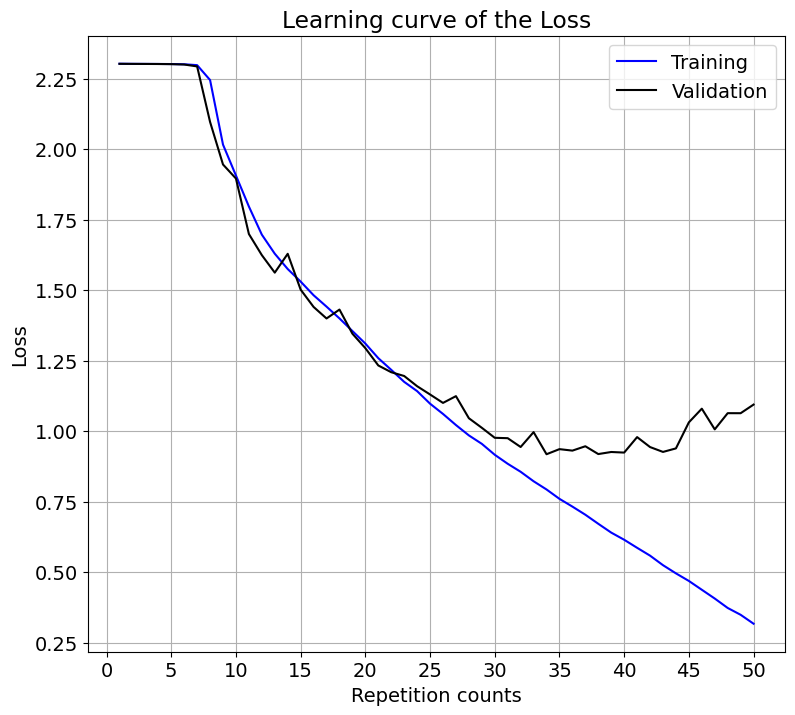

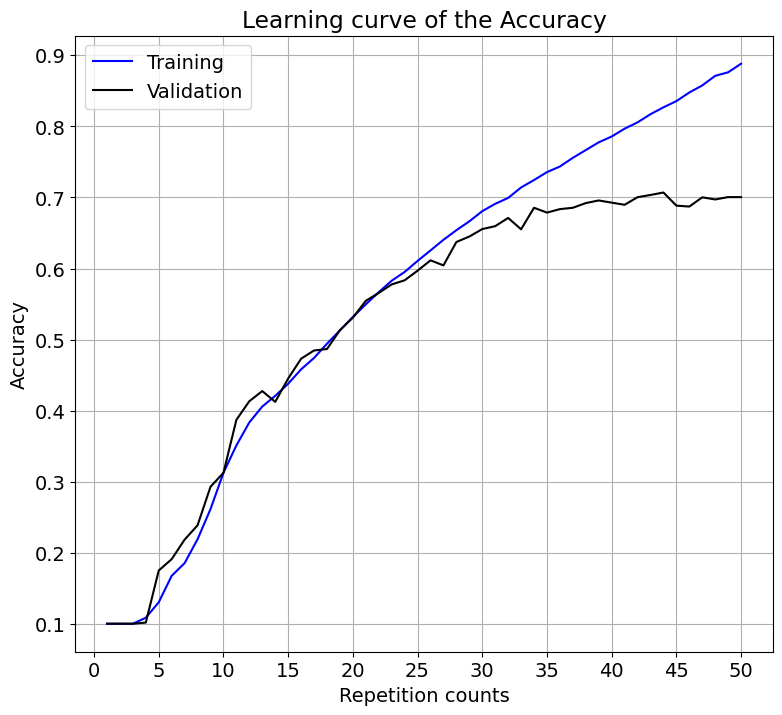

In [ ]:
evaluate_history(history)

- The validation accuracy is about 70%. It is 5% accuracy improvement.

## Choosing an Optimization Function

### Momentum settings

In [ ]:
# Learning rate
lr = 0.01

# Random number fixing
torch_seed()

# Create predict function
net = CNN_v2(n_output).to(device)

# Create loss function
criterion = nn.CrossEntropyLoss()

# Create Optimization function(Specify momentum = 0.9)
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=0.9)

# Repetition counts
num_epochs = 20

# Record evaluation results
history2 = np.zeros((0, 5))

## Execute image recognition with the optimized momentum function  

In [ ]:
history2 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history2)

## Confirm the loss values and accuracies and display the learning curve

Initial: Loss: 2.03596 Accuracy: 0.25550
Final: Loss: 1.27675 Accuracy: 0.75850


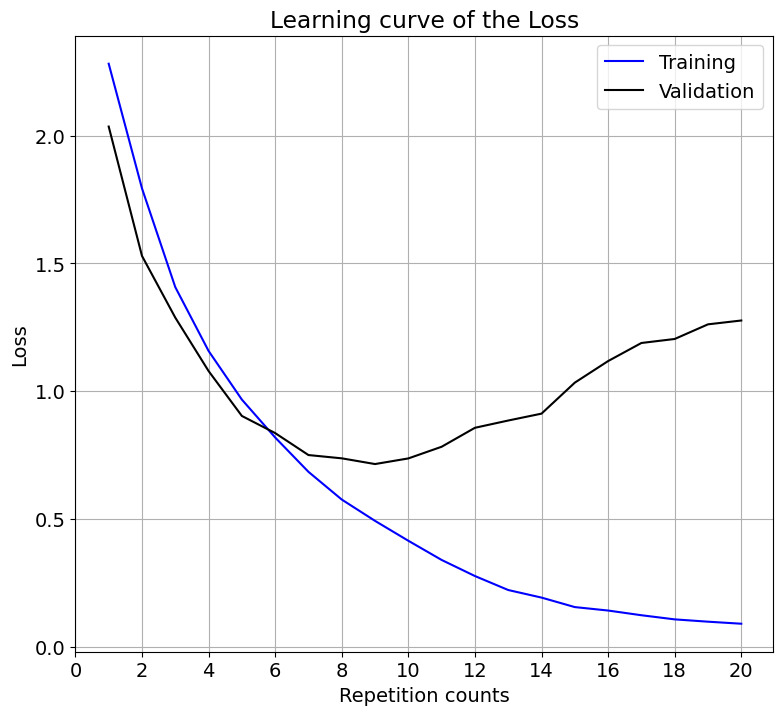

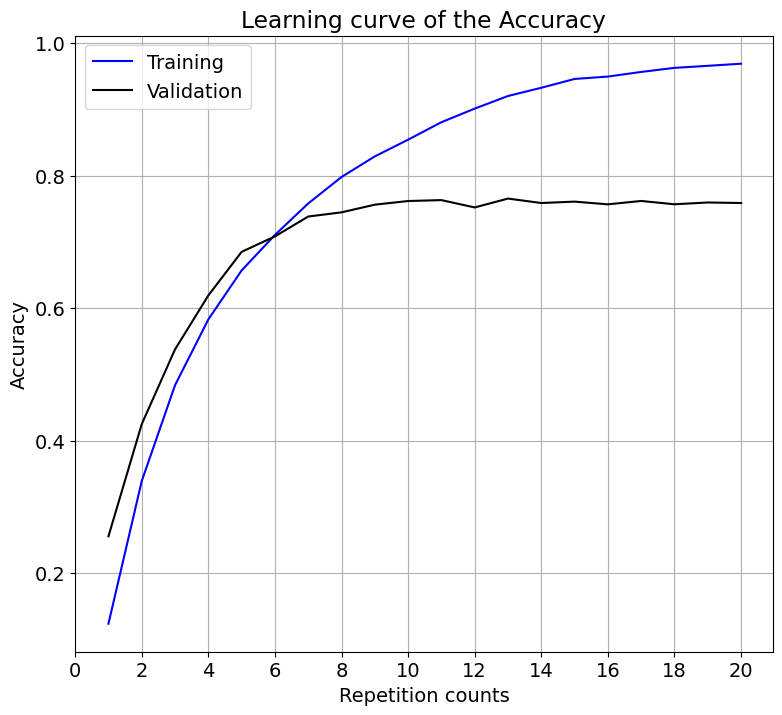

In [ ]:
evaluate_history(history2)

### Adam settings

In [ ]:
# Random number fixing
torch_seed()

# Create predict function
net = CNN_v2(n_output).to(device)

# Create loss function
criterion = nn.CrossEntropyLoss()

# Create Optimization function(Use Adam)
optimizer = optim.Adam(net.parameters())

# Repetition counts
num_epochs = 20

# Record evaluation results
history3 = np.zeros((0, 5))

## Execute image recognition with the optimized adam function

In [ ]:
history3 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history3)

## Confirm the loss values and accuracies and display the learning curve

Initial: Loss: 1.23411 Accuracy: 0.55260
Final: Loss: 1.44570 Accuracy: 0.76310


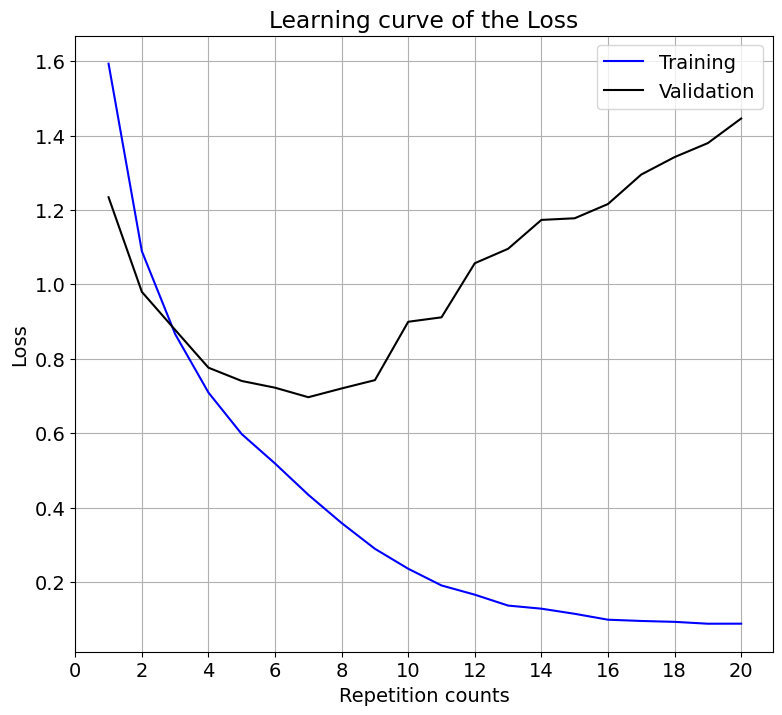

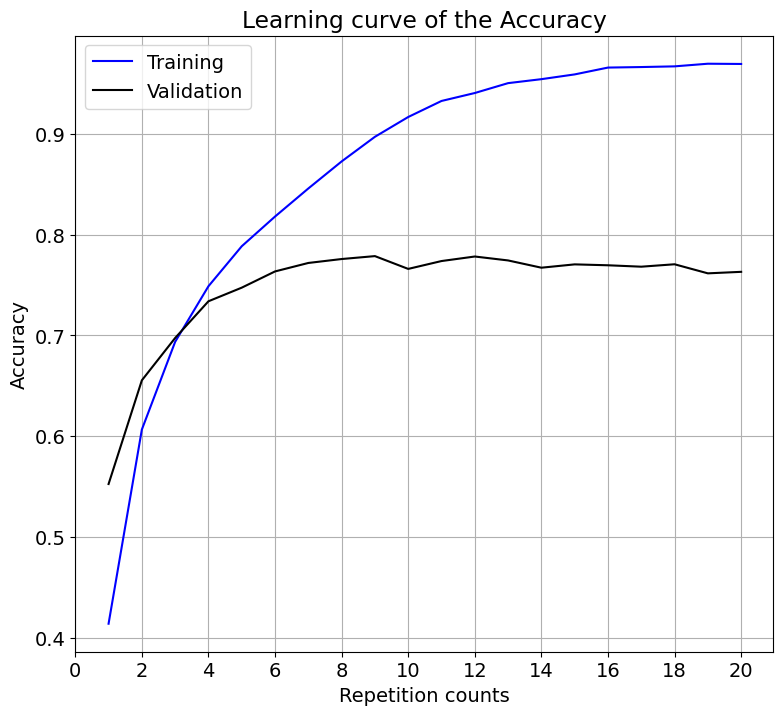

In [ ]:
evaluate_history(history3)

## Comparison results

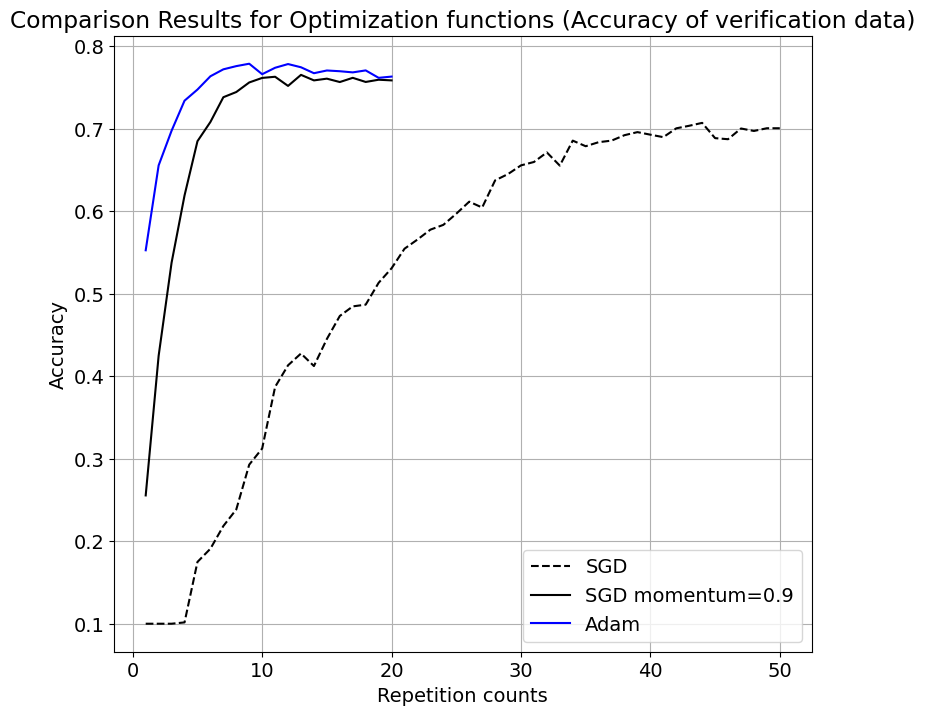

In [ ]:
plt.figure(figsize=(9,8))
plt.plot(history[:,0], history[:,4], label='SGD', c='k',ls='dashed' )
plt.plot(history2[:,0], history2[:,4], label='SGD momentum=0.9', c='k')
plt.plot(history3[:,0], history3[:,4], label='Adam', c='b')
plt.title('Comparison Results for Optimization functions (Accuracy of verification data)')
plt.xlabel('Repetition counts')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- The accuracy of Momentum and Adam is approximately 76% with fewer iterations compared to SGD.  

## Implement measures against overfitting  

### Dropout  

In [ ]:
class CNN_v3(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)

        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.relu,
            self.conv4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.relu,
            self.conv6,
            self.relu,
            self.maxpool,
            self.dropout3,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [ ]:
# Random number fixing
torch_seed()

# Create predict function
net = CNN_v3(n_output).to(device)

# Create loss function
criterion = nn.CrossEntropyLoss()

# Create Optimization function (Use Adam)
optimizer = optim.Adam(net.parameters())

# Repetition counts
num_epochs = 50

# Record evaluation results
history = np.zeros((0, 5))

## Execute image recognition with dropout  

In [ ]:
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

## Confirm the loss values and accuracies and display the learning curve  

Initial: Loss: 1.31135 Accuracy: 0.51440
Final: Loss: 0.55136 Accuracy: 0.83270


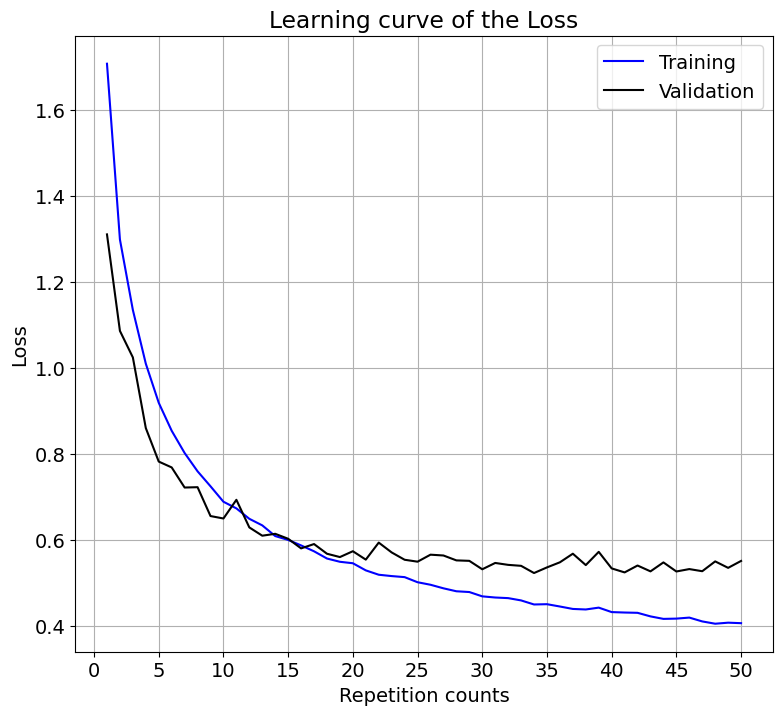

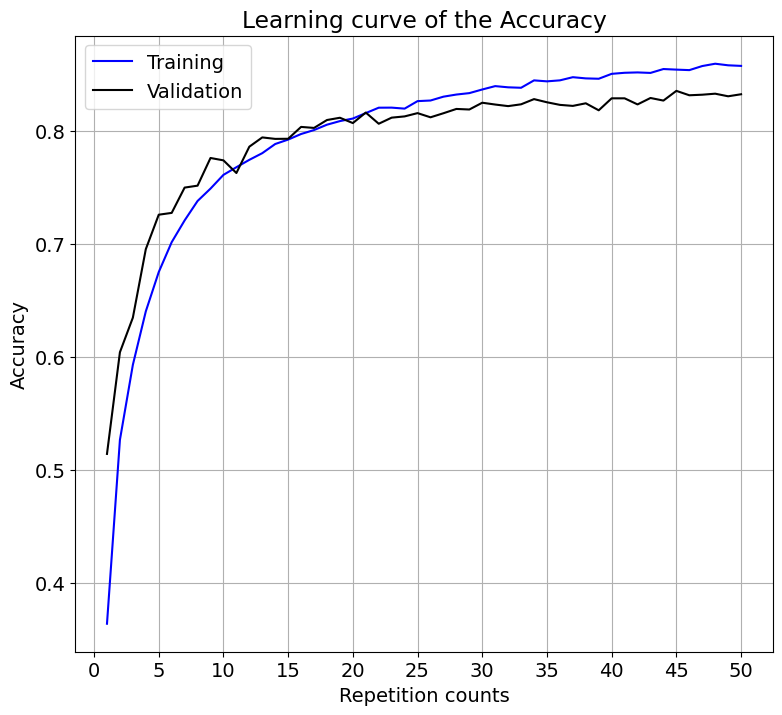

In [ ]:
evaluate_history(history)

- By implementing dropout, the accuracy is improved from 76% to 83%.  
- Although the accuracy is improved, the time required for learning increases.  

### Batch Normlization  

In [17]:
class CNN_v4(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=(1,1))
        self.conv2 = nn.Conv2d(32, 32, 3, padding=(1,1))
        self.conv3 = nn.Conv2d(32, 64, 3, padding=(1,1))
        self.conv4 = nn.Conv2d(64, 64, 3, padding=(1,1))
        self.conv5 = nn.Conv2d(64, 128, 3, padding=(1,1))
        self.conv6 = nn.Conv2d(128, 128, 3, padding=(1,1))
        self.relu = nn.ReLU(inplace=True)
        self.flatten = nn.Flatten()
        self.maxpool = nn.MaxPool2d((2,2))
        self.l1 = nn.Linear(4*4*128, 128)
        self.l2 = nn.Linear(128, num_classes)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.3)
        self.dropout3 = nn.Dropout(0.4)
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(32)
        self.bn3 = nn.BatchNorm2d(64)
        self.bn4 = nn.BatchNorm2d(64)
        self.bn5 = nn.BatchNorm2d(128)
        self.bn6 = nn.BatchNorm2d(128)

        self.features = nn.Sequential(
            self.conv1,
            self.bn1,
            self.relu,
            self.conv2,
            self.bn2,
            self.relu,
            self.maxpool,
            self.dropout1,
            self.conv3,
            self.bn3,
            self.relu,
            self.conv4,
            self.bn4,
            self.relu,
            self.maxpool,
            self.dropout2,
            self.conv5,
            self.bn5,
            self.relu,
            self.conv6,
            self.bn6,
            self.relu,
            self.maxpool,
            self.dropout3,
            )

        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.dropout3,
            self.l2
        )

    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [ ]:
# Random number fixing
torch_seed()

# Create predict function
net = CNN_v4(n_output).to(device)

# Create loss function
criterion = nn.CrossEntropyLoss()

# Create Optimization function (Use Adam)
optimizer = optim.Adam(net.parameters())

# Repetition counts
num_epochs = 50

# Record evaluation results
history = np.zeros((0, 5))

## Execute image recognition with batch normalization  

In [ ]:
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

## Confirm the loss values and accuracies and display the learning curve

Initial: Loss: 1.17889 Accuracy: 0.57190
Final: Loss: 0.45630 Accuracy: 0.86660


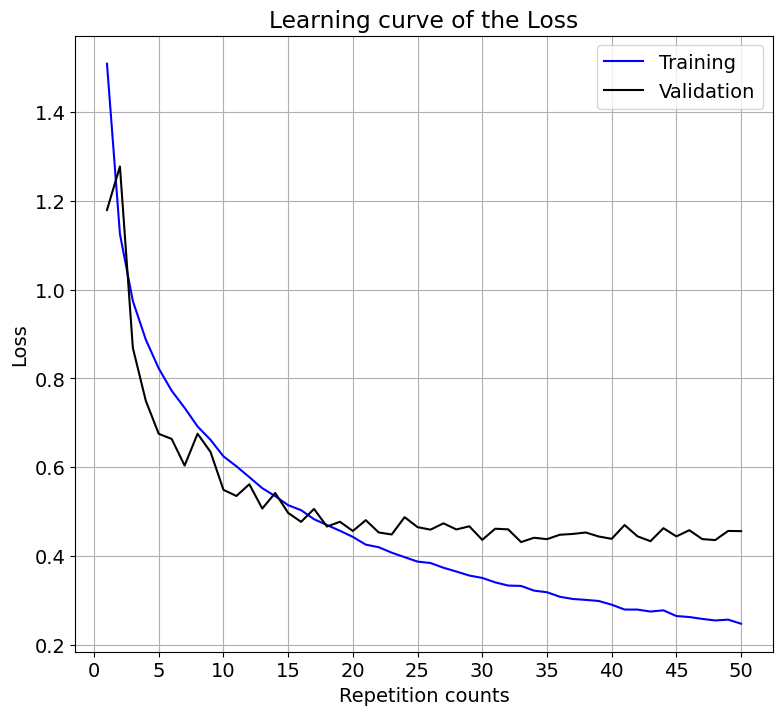

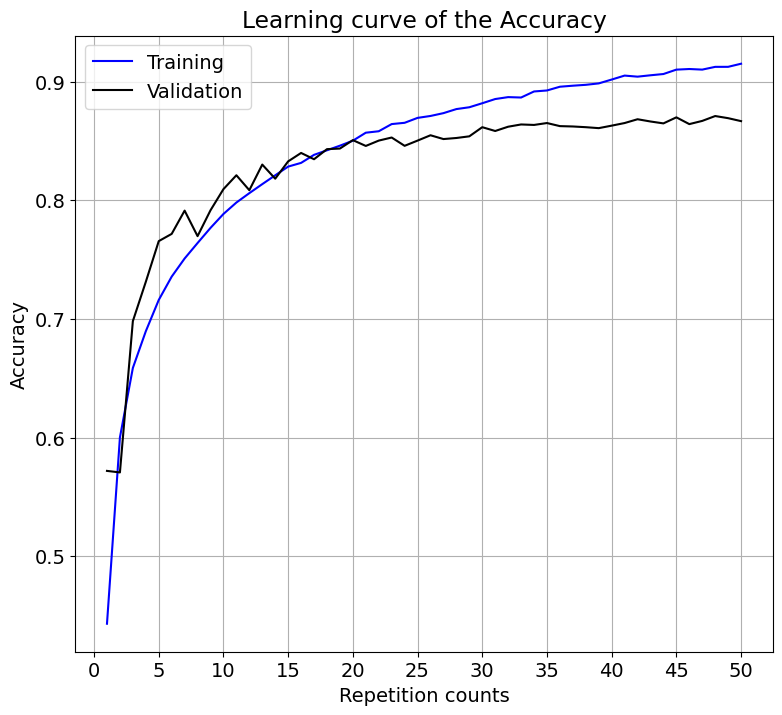

In [ ]:
evaluate_history(history)

- By adding BN function, the accuracy is improved from 83% to 87%.  

### Data Augmentation  

In [14]:
# Training data
transform_train = transforms.Compose([
  # Randomly flip left and right
  transforms.RandomHorizontalFlip(p=0.5),
  transforms.ToTensor(),
  transforms.Normalize(0.5, 0.5),
  # Randomly delete rectangular areas
  transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)
])

In [15]:
# Definition of a dataset using transform_train
train_set2 = datasets.CIFAR10(
    root = data_root, train = True,
    download = True, transform = transform_train)

# Definition of a data loader using traisform_train
batch_size = 100
train_loader2 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)

In [18]:
# Random number fixing
torch_seed()

# Create predict function
net = CNN_v4(n_output).to(device)

# Create loss function
criterion = nn.CrossEntropyLoss()

# Create Optimization function (Use Adam)
optimizer = optim.Adam(net.parameters())

# Repetition counts
num_epochs = 100

# Record evaluation results
history = np.zeros((0, 5))

## Execute image recognition with data augmentation  

In [ ]:
history = fit(net, optimizer, criterion, num_epochs,
        train_loader2, test_loader, device, history)

## Confirm the loss values and accuracies and display the learning curve

Initial: Loss: 1.44699 Accuracy: 0.50740
Final: Loss: 0.34640 Accuracy: 0.89100


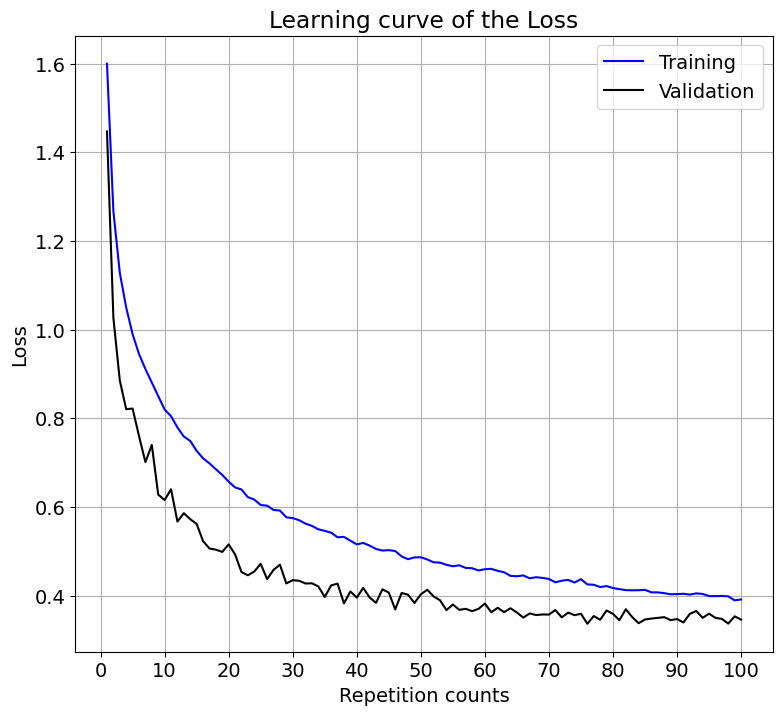

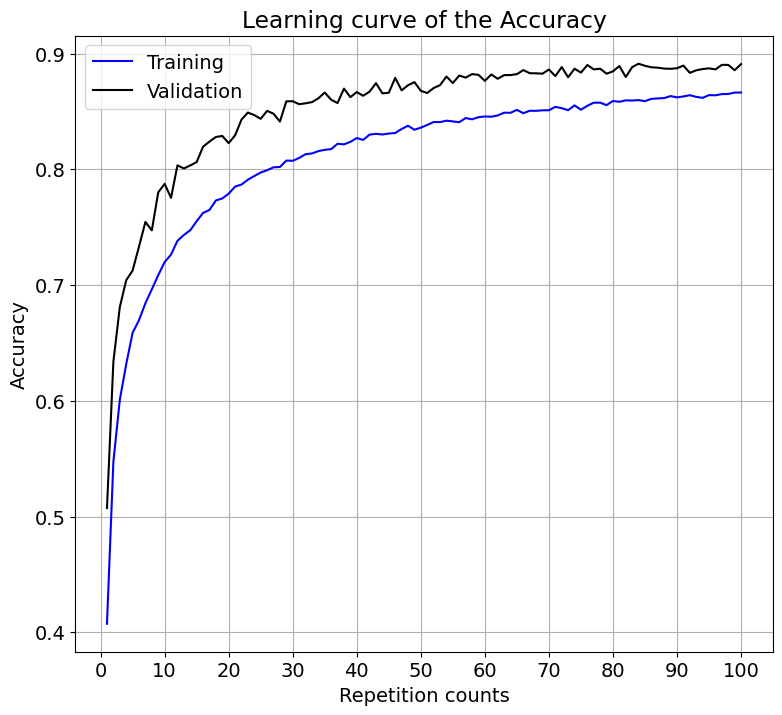

In [20]:
evaluate_history(history)

- The accuracy is improved from 87% to 89%.  
- Although the time required for learning increases, improving model accuracy by processing existing training data without modifying the model.  